## 숙제 01
# 기상데이터 분석
- 제출 기한 : 2023년 3월 21일 수업시작 전 까지
- 제출 방법 : 스마트리드

### 데이터 다운로드
- 기장자료개방포털 : https://data.kma.go.kr
- 로그인 후 : 데이터 -> 기상관측 -> 지상
- 자료형태 : 일자료, 기간 : 20220101 ~ 20221231
- 관측지점 : 강원도 -> 춘천
- 항목선택 : 평균기온, 평균 상대습도
- 다운로드 : "CSV" 버튼 눌러 다운로드

### 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

- pd.read_csv() 함수로 데이터 불러오기 (* encoding='cp949' 옵션으로 불러와야 한글이 깨지지 않음)

- 비어있는 데이터가 있는지 확인 (* data.info() 함수 이용)

- 평균기온과 평균상대습도 속성을 이용해 산점도 그리기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지점          365 non-null    int64  
 1   지점명         365 non-null    object 
 2   일시          365 non-null    object 
 3   평균기온(°C)    365 non-null    float64
 4   평균 상대습도(%)  365 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 14.4+ KB


<AxesSubplot:xlabel='평균기온(°C)', ylabel='평균 상대습도(%)'>

C:\Users\admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45824 missing from c

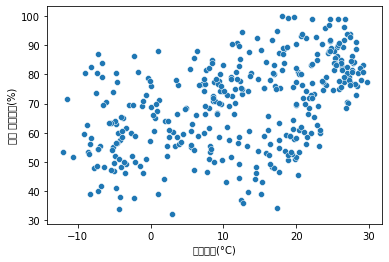

In [2]:
df=pd.read_csv('OBS_ASOS_DD_20230314163751.csv',encoding='cp949')
df.info()
sb.scatterplot(data=df,x='평균기온(°C)',y='평균 상대습도(%)')

In [74]:
df

,지점,지점명,일시,평균기온(°C),평균 상대습도(%)
0,101,춘천,2022-01-01,-8.2,58.1
1,101,춘천,2022-01-02,-2.7,59.9
2,101,춘천,2022-01-03,-3.8,64.9
3,101,춘천,2022-01-04,-3.4,61.5
4,101,춘천,2022-01-05,-4.7,63.0
...,...,...,...,...,...
360,101,춘천,2022-12-27,-7.2,86.9
361,101,춘천,2022-12-28,-5.4,63.5
362,101,춘천,2022-12-29,-5.7,63.4
363,101,춘천,2022-12-30,-4.6,77.4


### sklearn 훈련

In [3]:
from sklearn.linear_model import LinearRegression

- X, y 로 데이터 정의
> pandas 로 불러온 데이터는 "data['속성명'].values" 와 같이 numpy 로 변환하여야 한다

- LinearRegression 모델 적용하여 훈련

- 가중치와 절편값 확인 (model.coef_, model.intercept_)

- 예측값 y_pred 구하고, 결과 직선을 산점도 상에 표시하기 

- 온도가 올라가면 습도가 어떻게 변하는지 훈련결과에 기초하여 분석해 보시오
> 1도 올라갈때 마다 습도가 평균적으로 얼마나 증가하거나 감소하는가?

[0.6446899] 61.86801458546159


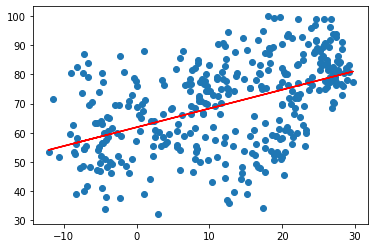

In [4]:
x=df['평균기온(°C)'].values.reshape(-1, 1)
y=df['평균 상대습도(%)'].values

model=LinearRegression()
model.fit(x,y)

print(model.coef_, model.intercept_)

y_pred = model.predict(x)

plt.scatter(x,y)
plt.plot(x, y_pred, 'r')

# 모델의 기울기가 0보다 큰 것을 보아 온도가 올라갈 때마다 상대습도가 올라가는 것을 볼 수 있고
# 1도가 올라가면 약 1% 올라가는 것으로 보인다.

### keras 로 훈련하기

In [9]:
import tensorflow as tf
from tensorflow.python.keras import layers, models

- X, y 로 데이터 정의
> - 값이 커서 훈련시 오버플로우 생길수 있음
> - 원본 데이터의 값들을 100으로 나누어 줄 것!

- 케라스로 선형회귀 모델 설계하고 훈련
> - epoch=1000 회 실시

- 손실값 감소 그래프 그리기

- 가중치 값 확인
> - sklearn 에서 얻은 값과 비교하여 분석하시오

- 예측값 y_pred 구하고, 결과 직선을 산점도 상에 표시하기 

In [42]:
x2 = x/100
y2 = y/100

kmodel = models.Sequential()
kmodel.add(layers.Dense(1))


kmodel.compile(loss='mse', optimizer='sgd')
kmodel.fit(x2,y2,epochs = 1000)

Epoch 1/1000
12/12 [==============================] - 1s 2ms/step - loss: 0.5128
Epoch 2/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.3268
Epoch 3/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2139
Epoch 4/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.1444
Epoch 5/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.1017
Epoch 6/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0755
Epoch 7/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0595
Epoch 8/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0495
Epoch 9/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0433
Epoch 10/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0394
Epoch 11/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0370
Epoch 12/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0355
Epoch 13/1000
12/12 [====

12/12 [==============================] - 0s 3ms/step - loss: 0.0270
Epoch 101/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.0269
Epoch 102/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0269
Epoch 103/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0268
Epoch 104/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.0268
Epoch 105/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0267
Epoch 106/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0267
Epoch 107/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.0266
Epoch 108/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0266
Epoch 109/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.0265
Epoch 110/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0265
Epoch 111/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0264
Epoch 112/1000
12/1

12/12 [==============================] - 0s 2ms/step - loss: 0.0230
Epoch 199/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0230
Epoch 200/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.0229
Epoch 201/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0229
Epoch 202/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0229
Epoch 203/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0228
Epoch 204/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0228
Epoch 205/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.0228
Epoch 206/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.0228
Epoch 207/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.0227
Epoch 208/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0227
Epoch 209/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.0227
Epoch 210/1000
12/1

12/12 [==============================] - 0s 2ms/step - loss: 0.0208
Epoch 297/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0208
Epoch 298/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0207
Epoch 299/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.0207
Epoch 300/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0207
Epoch 301/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0207
Epoch 302/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0207
Epoch 303/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0207
Epoch 304/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0207
Epoch 305/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0206
Epoch 306/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0206
Epoch 307/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0206
Epoch 308/1000
12/1

12/12 [==============================] - 0s 3ms/step - loss: 0.0196
Epoch 395/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0195
Epoch 396/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0195
Epoch 397/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0195
Epoch 398/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0195
Epoch 399/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.0195
Epoch 400/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0195
Epoch 401/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0195
Epoch 402/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0195
Epoch 403/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0195
Epoch 404/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0195
Epoch 405/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0195
Epoch 406/1000
12/1

12/12 [==============================] - 0s 2ms/step - loss: 0.0189
Epoch 493/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0189
Epoch 494/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0189
Epoch 495/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.0189
Epoch 496/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0189
Epoch 497/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0189
Epoch 498/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0188
Epoch 499/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0188
Epoch 500/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0188
Epoch 501/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0188
Epoch 502/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0188
Epoch 503/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0188
Epoch 504/1000
12/1

12/12 [==============================] - 0s 3ms/step - loss: 0.0185
Epoch 591/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0185
Epoch 592/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0185
Epoch 593/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0185
Epoch 594/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0185
Epoch 595/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0185
Epoch 596/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0185
Epoch 597/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0185
Epoch 598/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0185
Epoch 599/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0185
Epoch 600/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0185
Epoch 601/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0185
Epoch 602/1000
12/1

12/12 [==============================] - 0s 3ms/step - loss: 0.0183
Epoch 689/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0183
Epoch 690/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0183
Epoch 691/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0183
Epoch 692/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0183
Epoch 693/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0183
Epoch 694/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0183
Epoch 695/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0183
Epoch 696/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0183
Epoch 697/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0183
Epoch 698/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0183
Epoch 699/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.0183
Epoch 700/1000
12/1

12/12 [==============================] - 0s 2ms/step - loss: 0.0182
Epoch 787/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0182
Epoch 788/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0182
Epoch 789/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.0182
Epoch 790/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0182
Epoch 791/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0182
Epoch 792/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0182
Epoch 793/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0182
Epoch 794/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.0182
Epoch 795/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.0182
Epoch 796/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0182
Epoch 797/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.0182
Epoch 798/1000
12/1

12/12 [==============================] - 0s 3ms/step - loss: 0.0181
Epoch 885/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.0181
Epoch 886/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.0181
Epoch 887/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0181
Epoch 888/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.0181
Epoch 889/1000
12/12 [==============================] - ETA: 0s - loss: 0.022 - 0s 2ms/step - loss: 0.0181
Epoch 890/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.0181
Epoch 891/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.0181
Epoch 892/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0181
Epoch 893/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0181
Epoch 894/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0181
Epoch 895/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.

12/12 [==============================] - 0s 2ms/step - loss: 0.0181
Epoch 983/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0181
Epoch 984/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0181
Epoch 985/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0181
Epoch 986/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0181
Epoch 987/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0181
Epoch 988/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0181
Epoch 989/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0181
Epoch 990/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0181
Epoch 991/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0181
Epoch 992/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0181
Epoch 993/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0181
Epoch 994/1000
12/1

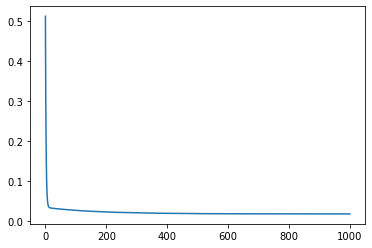

In [43]:
h = kmodel.history.history
plt.plot(h['loss'])

Keras 가중치 : [0.62519354] 
Sklearn 가중치 : [0.6446899]


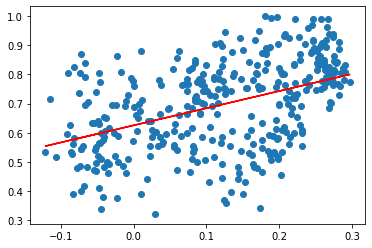

In [66]:
y_pred = kmodel.predict(x2)

plt.scatter(x2,y2)
plt.plot(x2,y_pred,'r')

print("Keras 가중치 :", kmodel.get_weights()[1],"\nSklearn 가중치 :",model.coef_)

### 보너스 문제
- 1년 동안의 온도 변화를 그래프로 그려보시오.
- 온도변화를 선형회귀로 적용해 보시오
> - X 는 1,2,3,4,5,... 와 같이 잡아야 한다.
> - y 는 온도값이다
> - 직선을 그리기 위해서는 기간을 제한해야 한다

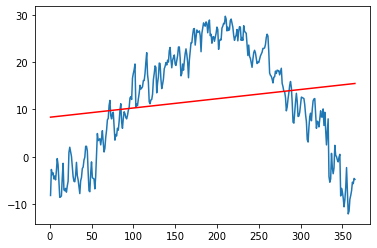

In [93]:
x=df.index.values+1
x2=x.reshape(-1,1)
y=df['평균기온(°C)']

model=LinearRegression()
model.fit(x2,y)

y_pred=model.predict(x2)

plt.plot(x,y)
plt.plot(x,y_pred,'r')